# Aashray Anand
5/24/2019, 11:20 PM
 
This notebook contains different experiments, working with the
 
NBA stats data from the below blog post, and practicing using pyspark

"Using Apache Spark for Sports Analytics: https://content.pivotal.io/blog/how-data-science-assists-sports"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark as spark

In [2]:
shots = pd.read_csv('./shots/current_year_shot_data.csv')

In [3]:
shots.columns
shots['YEAR'] = shots['GAME_DATE'].astype(str)
for i, row in shots.iterrows():
    res = shots.at[i, 'YEAR']
    shots.at[i, 'YEAR'] = res[0:4]
shots['YEAR'] = shots['YEAR'].astype(int)

In [4]:
steph = shots[(shots['PLAYER_NAME'] == 'Stephen Curry')]

In [5]:
steph

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,YEAR
5969,5969,Shot Chart Detail,21800002,10,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,...,24+ ft.,24,226,90,1,1,20181016,GSW,OKC,2018
5970,5970,Shot Chart Detail,21800002,58,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,...,Less Than 8 ft.,6,-2,63,1,1,20181016,GSW,OKC,2018
5971,5971,Shot Chart Detail,21800002,131,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,...,Less Than 8 ft.,2,5,29,1,1,20181016,GSW,OKC,2018
5972,5972,Shot Chart Detail,21800002,141,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,...,Less Than 8 ft.,1,-6,18,1,0,20181016,GSW,OKC,2018
5973,5973,Shot Chart Detail,21800002,145,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,...,24+ ft.,22,-228,8,1,1,20181016,GSW,OKC,2018
5974,5974,Shot Chart Detail,21800002,276,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,...,8-16 ft.,9,96,25,1,0,20181016,GSW,OKC,2018
5975,5975,Shot Chart Detail,21800002,293,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,...,24+ ft.,28,-204,195,1,1,20181016,GSW,OKC,2018
5976,5976,Shot Chart Detail,21800002,368,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,...,Less Than 8 ft.,2,6,25,1,1,20181016,GSW,OKC,2018
5977,5977,Shot Chart Detail,21800002,374,201939,Stephen Curry,1610612744,Golden State Warriors,2,0,...,8-16 ft.,12,113,52,1,0,20181016,GSW,OKC,2018
5978,5978,Shot Chart Detail,21800002,418,201939,Stephen Curry,1610612744,Golden State Warriors,3,9,...,24+ ft.,28,25,281,1,1,20181016,GSW,OKC,2018


In [6]:
# we can draw a set of matplotlib shapes on the above plot, to be able to build a more powerful data visualization
from matplotlib.patches import Circle, Rectangle, Arc

def make_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    elem = []
    rim = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    elem.append(rim)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    elem.append(corner_three_a)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    elem.append(corner_three_b)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    elem.append(three_arc)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    back_bound = Rectangle((-250,-47.5), 500, 0, color=color, linewidth=lw)
    left_bound = Rectangle((-250,-47.5), 0, 470, color=color, linewidth=lw)
    right_bound = Rectangle((250,-47.5), 0, 470, color=color, linewidth=lw)
    center_court = Rectangle((-250, 422.5), 500, 0, color=color, linewidth=lw)
    elem.append(center_inner_arc)
    elem.append(center_outer_arc)
    elem.append(backboard)
    elem.append(outer_box)
    elem.append(inner_box)
    elem.append(top_free_throw)
    elem.append(bottom_free_throw)
    elem.append(restricted)
    elem.append(back_bound)
    elem.append(left_bound)
    elem.append(right_bound)
    elem.append(center_court)
    for e in elem:
        ax.add_patch(e)
    return ax

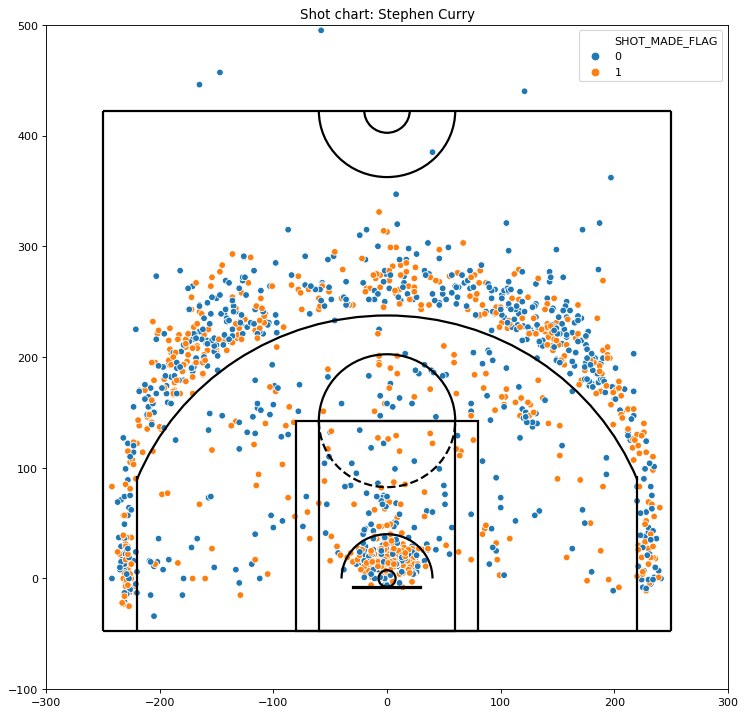

In [7]:
def make_shot_chart(name, ax=None):
    data = shots[(shots['PLAYER_NAME'] == name)]
    plt.figure(num=None, figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.gca() if ax is None else ax
    make_court(ax=ax, outer_lines=True)
    sns.scatterplot(x="LOC_X", y="LOC_Y", data=data, hue='SHOT_MADE_FLAG', ax=ax)
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.xlabel("")
    plt.ylabel("")
    plt.title("Shot chart: {}".format(name))
    plt.show()
make_shot_chart("Stephen Curry")

In [8]:
shots.PLAYER_NAME.unique()

array(['James Harden', 'Paul George', 'Giannis Antetokounmpo',
       'Joel Embiid', 'Stephen Curry', 'Kawhi Leonard', 'Devin Booker',
       'Kevin Durant', 'Damian Lillard', 'Kemba Walker', 'Bradley Beal',
       'Blake Griffin', 'Karl-Anthony Towns', 'Kyrie Irving',
       'Donovan Mitchell', 'Zach LaVine', 'Russell Westbrook',
       'Klay Thompson', 'Julius Randle', 'LaMarcus Aldridge',
       'DeMar DeRozan', 'Luka Doncic', 'Jrue Holiday', "D'Angelo Russell",
       'Mike Conley', 'CJ McCollum', 'Nikola Vucevic', 'Buddy Hield',
       'Nikola Jokic', 'Tobias Harris', 'Lou Williams', 'Danilo Gallinari',
       'John Collins', 'Trae Young', 'Jimmy Butler', 'Kyle Kuzma',
       'Khris Middleton', 'Jamal Murray', 'Andrew Wiggins',
       'Tim Hardaway Jr.', 'JJ Redick', 'Bojan Bogdanovic',
       'Andre Drummond', "De'Aaron Fox", 'Pascal Siakam', 'Ben Simmons',
       'Jordan Clarkson', 'Spencer Dinwiddie', 'Collin Sexton',
       'Clint Capela', 'Montrezl Harrell', 'Josh Richardson'

In [9]:
averages = pd.read_csv('./data/player_averages.csv')
averages.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year'],
      dtype='object')

In [10]:
averages['Year'] = averages['Year'].fillna(0)

In [11]:
averages['Year'] = averages['Year'].astype(int)
rel_averages = averages[averages['Year'] == 2019]

In [ ]:
massive_data_set = pd.merge(shots, rel_averages, how='inner', left_on='YEAR', right_on='Year')

In [ ]:
massive_data_set.columns

In [ ]:
rel_data = massive_data_set.drop(['Unnamed: 0_x', 'GRID_TYPE', 'STL', 'BLK', 'TOV', 'PF', 'ORB', 'DRB', 'AST', 'Unnamed: 0_y'], axis=1)